# ASSIGNMENT 1 - ML DATA CLEANING AND FEATURE SELECTION
##  <span style="color:gray;font-family: Times New Roman"><u>Data Set - Bank Customers Churn</u></span> 

### Author : Shivani Shekhawat 
### NUID : 2656554

# Abstract: 

A well-known bank has been observing a lot of customers closing their accounts or switching to competitor banks over the past couple of quarters. This has caused a huge dent in their quarterly revenues and might drastically affect annual revenues for the ongoing financial year, causing stocks to plunge and market cap to reduce significantly. The idea is to be able to predict which customers are going to churn so that necessary actions/interventions can be taken by the bank to retain such customers.

In this project, we are provided with customer data pertaining to his past transactions with the bank and some demographic information. We use this to establish relations/associations between data features and customer's propensity to churn and build a classification model to predict whether the customer will leave the bank or not. We also go about explaining model predictions through multiple visualizations and give insight into which factor(s) are responsible for the churn of the customers.

This project walks you through a complete end-to-end cycle of a data science project in the banking industry, right from the deliberations during formation of the problem statement to making the model deployment-ready.

# About the data:

The data is obtained from Kaggle. It consists of 10,000 rows and 14 columns.
It includes several categorical and numeric variables.

It has several features including (but not limited to) age, gender, geography, tenure, balance.etc of unique customers. Such features have contribute towards a Churn factor. It can help us tell the chances of a customer leaving or staying with the bank.

In [1]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

from sklearn.model_selection import train_test_split

In [3]:
## Reading the dataset
#churn_df = pd.read_csv('Assignment_1/Churn_Modelling.csv')
churn_df = pd.read_csv('Churn_Modelling.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df.shape

(10000, 14)

In [5]:
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Below are the data types for the columns

* For Credit Score: **Numeric**
* For Geography: **Categorical**
* For Gender: **Categorical**
* For Age: **Numeric**
* For Tenure: **Numeric**
* For Balance: **Numeric**
* For NumOfProducts: **Numeric**
* For HasCrCard: **Categorical**
* For IsActiveMember: **Categorical**
* For EstimatedSalary: **Numeric**
* For Exited: **Categorical**

## Data Discovery and EDA

In [6]:
churn_df.describe() # Describe all numerical columns

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
churn_df.describe(include = ['O']) # Describe all non-numerical/categorical columns

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
## Checking number of unique customers in the dataset
len(set(churn_df.CustomerId))

10000

In [10]:
# Geographical Analysis
churn_df.Geography.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [11]:
# Gender Analysis
churn_df.Gender.value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [12]:
# Credit Card Analysis
churn_df.HasCrCard.value_counts(normalize=True)

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

In [13]:
# Active Member Analysis
churn_df.IsActiveMember.value_counts(normalize=True)

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

There are no missing values in any of the variables
    
#### <span style="color:black"><u>Missing Values:</u></span> 
- If the column/feature has too many missing values, it can be dropped as it might not add much relevance to the data

- If there a few missing values, the column/feature can be imputed with its summary statistics (mean/median/mode) and/or numbers like 0, -1 etc.

#### <span style="color:black"><u>Outliers:</u></span> 

- Can be observed from distribution plots and count plots of different features

- Outliers can either be logically improbable (as per the feature definition) or just an extreme value as compared to the feature distribution(eg. negative age or tenure)

- As part of outlier treatment, the particular row containing the outlier can be removed from the training set, provided they do not form a significant chunk of the dataset (< 0.5-1%)

- In cases where the value of outlier is logically faulty, e.g. negative Age or CreditScore > 900, the particular record can be replaced with mean of the feature or the nearest among min/max logical value of the feature
    

<div class="alert alert-block alert-info">
<b>Observation - I </b><br>
- Exited (churn indicator) is the feature to be predicted<br>
- Discard row number (meaningless for analysis)<br>
- Discard CustomerID as well, since it doesn't convey any extra info. Each row pertains to a unique customer<br>
- Discard Surname as it is not very useful as well<br>
- Based on the above, columns/features can be segregated into to be discarded, numerical, categorical and target variables<br>
</div>



In [14]:
target = ['exited']
drop_cols = ['Surname', 'RowNumber', 'CustomerId']
numeric_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_variables = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [15]:
churn_df.drop(columns = drop_cols, inplace = True)

In [16]:
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Distributions of the numeric variables

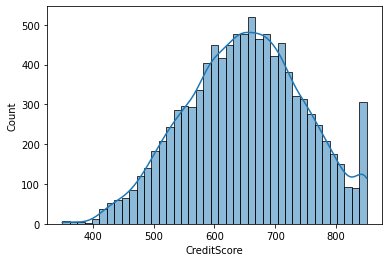

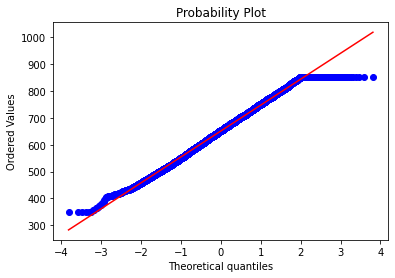

In [17]:
from scipy import stats

sns.histplot(data = churn_df, x = "CreditScore", kde = True)
fig = plt.figure()
res = stats.probplot(churn_df['CreditScore'], plot=plt)

#### Though the right tail of the distribution has been cut-off, its because of the credit score has a maximum limit of 840. We can assume the data to be normally distributed.

#### Distribution of 'Credit Score' : NORMAL

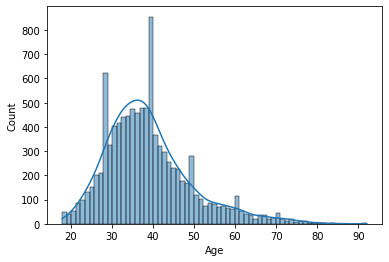

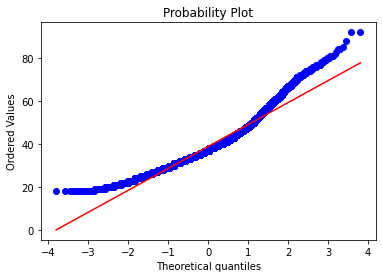

In [18]:
sns.histplot(data = churn_df, x = "Age", kde = True)
fig = plt.figure()
res = stats.probplot(churn_df['Age'], plot=plt)

#### Distribution of 'Age' : GAMMA

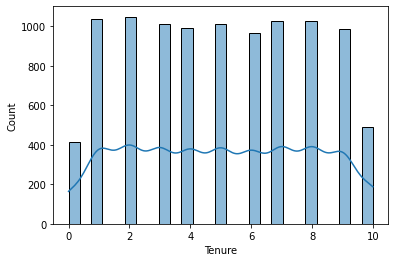

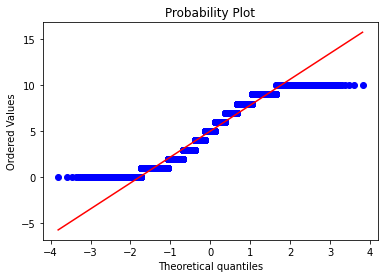

In [19]:
sns.histplot(data = churn_df, x = "Tenure", kde = True)
fig = plt.figure()
res = stats.probplot(churn_df['Tenure'], plot=plt)

#### Distribution of 'Tenure' : UNIFORM

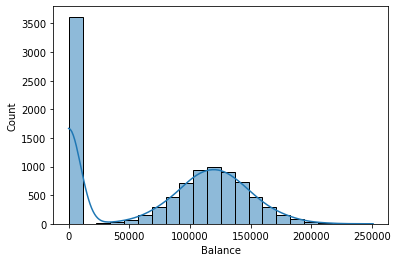

In [20]:
sns.histplot(data = churn_df, x = "Balance", kde = True)

#### Distribution of 'Balance': BIMODAL

Balance has two peaks which mean it is a bimodal distribution

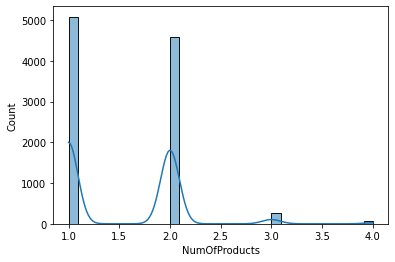

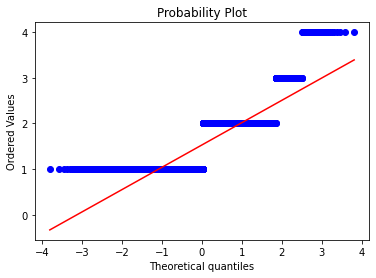

In [21]:
sns.histplot(data = churn_df, x = "NumOfProducts", kde = True)
fig = plt.figure()
res = stats.probplot(churn_df['NumOfProducts'], plot=plt)

#### Distribution of 'NumOfProducts': Though it is a numerical feature, it has 4 distinct values and does not follow any distribution.

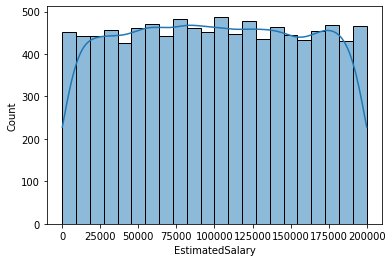

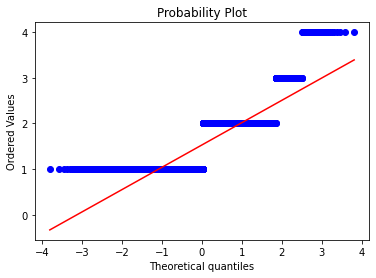

In [22]:
sns.histplot(data = churn_df, x = "EstimatedSalary", kde = True)
fig = plt.figure()
res = stats.probplot(churn_df['NumOfProducts'], plot=plt)

#### Distribution of 'EstimatedSalary': UNIFORM

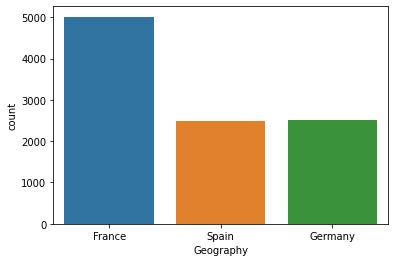

In [23]:
sns.countplot(x=churn_df["Geography"])

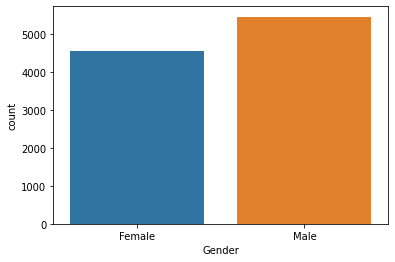

In [24]:
sns.countplot(x=churn_df["Gender"])

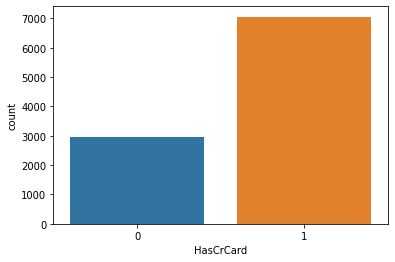

In [25]:
sns.countplot(x=churn_df["HasCrCard"])

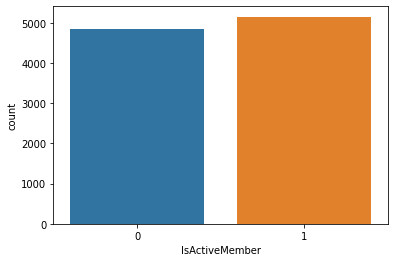

In [26]:
sns.countplot(x=churn_df["IsActiveMember"])

<div class="alert alert-block alert-info">
<b>Observation - II</b><br>
- EstimatedSalary is uniformly distributed and might not turn out to be an important predictor<br>
- For NumOfProducts , there are predominantly only two values (1 and 2). Hence, its chances of being a strong predictor is also very unlikely<br>
- Balance has a bi-modal distribution. As we have only two classes, it might turn out to be a very good predictor<br>
- None of the categorical variables have any outlier/highly unique class.<br>
</div>

## Using Pearson's correlation, Spearman's correlation and OLS method for p-value estimation

#### Missing values and outliers

In [27]:
## Missing Values per Columns 
churn_df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Train-Test-Validation split

Train-Valid-Test split is a technique to evaluate the performance of your machine learning model — classification or regression alike. You take a given dataset and divide it into three subsets.

* Train Data: Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model


* Validation Data: 
    * Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters

    * Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection


* Test Data: Set of data used to provide an unbiased evaluation of a final model fitted on the training dataset

In [28]:
# dropping column 'Exited' as it is the predictor variable
churn_df_x = churn_df.drop(columns = ['Exited'])

In [29]:
churn_df_y = churn_df[['Exited']]
churn_df_y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [30]:
## Making two sets, one is test set, another is train+validation set
## Test Set = 20%
## Train+Validation = 80%
X_train_val, X_test, y_train_val, y_test = train_test_split(churn_df_x, churn_df_y, test_size = 0.20, random_state = 42)

## Splitting the train+validation set into seperate train and validation sets
## Train Set = 70%
## Validation Set = 10%
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.10, random_state = 42)

In [31]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7200, 10), (800, 10), (2000, 10), (7200, 1), (800, 1), (2000, 1))

## Encoding

There are 2 types on encodings done for the features:

1. **Label Encoding:** Each label is assigned a unique integer based on alphabetical ordering
2. **One Hot Encoding:**  It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

**We fit only on train dataset as that's the only data we'll assume we have. We'll treat validation and test sets as unseen data. Hence, they can't be used for fitting the encoders.**

### Label encoding for binary categorical variables

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
## Label encoding of Gender variable
#df_train['Gender'] = le.fit_transform(df_train['Gender'])
X_train['Gender'] = le.fit_transform(X_train['Gender'])

In [34]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Female': 0, 'Male': 1}

In [35]:
## Encoding Gender feature for validation and test set
X_val['Gender'] = X_val.Gender.map(le_name_mapping)
X_test['Gender'] = X_test.Gender.map(le_name_mapping)

## Filling missing/NaN values created due to new categorical levels
X_val['Gender'].fillna(-1, inplace=True)
X_test['Gender'].fillna(-1, inplace=True)

In [36]:
X_train.Gender.unique(), X_val.Gender.unique(), X_test.Gender.unique()

(array([1, 0]), array([0, 1]), array([1, 0]))

All the datasets have binary genders as expected.

### One-hot encoding for categorical variables

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

In [39]:
enc_train = le_ohe.fit_transform(X_train.Geography).reshape(X_train.shape[0],1)
enc_train.shape
np.unique(enc_train)

(7200, 1)

array([0, 1, 2])

In [40]:
ohe_train = ohe.fit_transform(enc_train)

In [41]:
le_ohe_name_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_name_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [42]:
## Encoding Geography feature for validation and test set
enc_val = X_val.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)
enc_test = X_test.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)

In [43]:
np.unique(enc_val)
np.unique(enc_test)

array([0, 1, 2])

array([0, 1, 2])

In [44]:
ohe_val = ohe.transform(enc_val)
ohe_test = ohe.transform(enc_test)

#### Adding the one-hot encoded columns to the dataframe and removing the original feature

In [45]:
cols = ['country_' + str(x) for x in le_ohe_name_mapping.keys()]
cols

['country_France', 'country_Germany', 'country_Spain']

In [46]:
## Adding to the respective dataframes
X_train = pd.concat([X_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
X_val = pd.concat([X_val.reset_index(), pd.DataFrame(ohe_val, columns = cols)], axis = 1).drop(['index'], axis=1)
X_test = pd.concat([X_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)

In [47]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')

New one-hot encoded columns have been addedd to all the three datasets.

In [48]:
print("Training set")
X_train.head()
print("\n\nValidation set")
X_val.head()
print("\n\nTest set")
X_test.head()

Training set


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain
0,538,Spain,1,68,9,0.00,2,1,0,110440.50,0.0,0.0,1.0
1,809,France,0,39,5,0.00,1,1,0,77705.75,1.0,0.0,0.0
2,620,France,1,32,7,0.00,2,1,1,34665.79,1.0,0.0,0.0
3,679,Spain,1,33,4,96110.22,1,1,0,1173.23,0.0,0.0,1.0
4,575,Spain,1,30,2,0.00,2,1,1,82222.86,0.0,0.0,1.0




Validation set


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain
0,801,France,0,32,4,75170.54,1,1,1,37898.50,1.0,0.0,0.0
1,766,Germany,0,28,4,90696.78,1,0,1,21597.20,0.0,1.0,0.0
2,828,Spain,1,28,8,134766.85,1,1,0,79355.87,0.0,0.0,1.0
3,798,France,1,36,1,0.00,2,1,1,159044.10,1.0,0.0,0.0
4,611,Spain,1,34,4,0.00,2,1,0,170950.58,0.0,0.0,1.0




Test set


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain
0,596,Germany,1,32,3,96709.07,2,0,0,41788.37,0.0,1.0,0.0
1,623,France,1,43,1,0.00,2,1,1,146379.30,1.0,0.0,0.0
2,601,Spain,0,44,4,0.00,2,1,0,58561.31,0.0,0.0,1.0
3,506,Germany,1,59,8,119152.10,2,1,1,170679.74,0.0,1.0,0.0
4,560,Spain,0,27,7,124995.98,1,1,1,114669.79,0.0,0.0,1.0


In [49]:
## Dropping the oiginal Geography columndf_train.drop(['Geography'], axis = 1, inplace=True)
X_val.drop(['Geography'], axis = 1, inplace=True)
X_test.drop(['Geography'], axis = 1, inplace=True)
X_train.drop(['Geography'], axis = 1, inplace=True)

### Multivariate Analysis

<Figure size 1440x504 with 0 Axes>

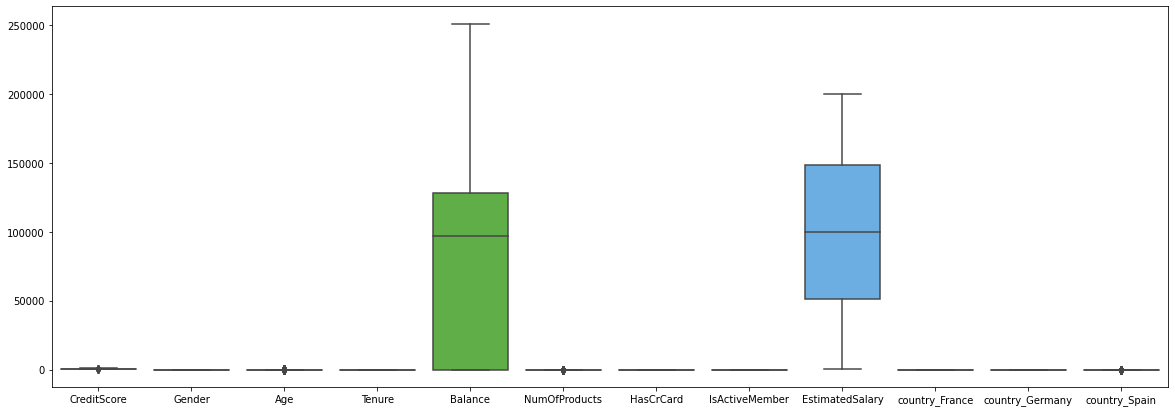

In [50]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=X_train)

#### Since the values of 'Balance' and 'Estimated Salary' are very high compared to other features, it will dominate if we do not scale all the features. Therefore, using MinMaxScaler for scaling of numerical features

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [52]:
## Features for scaling
scaling_cols = ['CreditScore','Tenure', 'Balance', 'EstimatedSalary', 'Age', 'NumOfProducts']

In [53]:
X_train[scaling_cols] = mms.fit_transform(X_train[scaling_cols])

In [54]:
## Transforming Test and Validation sets with respect to train set
X_test[scaling_cols] = mms.transform(X_test[scaling_cols])
X_val[scaling_cols] = mms.transform(X_val[scaling_cols])

### Range of Predictor variable values

<Figure size 1440x504 with 0 Axes>

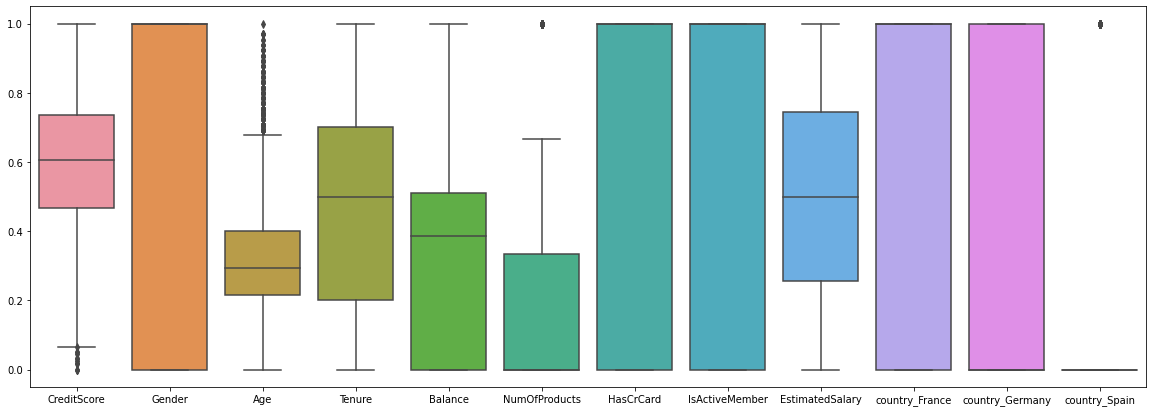

In [55]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X_train)

<Figure size 1440x504 with 0 Axes>

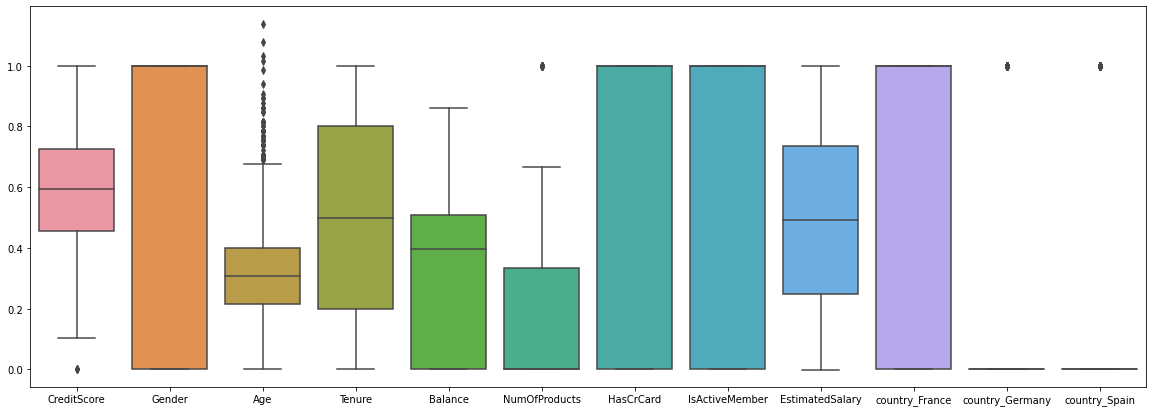

In [56]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X_test)

<Figure size 1440x504 with 0 Axes>

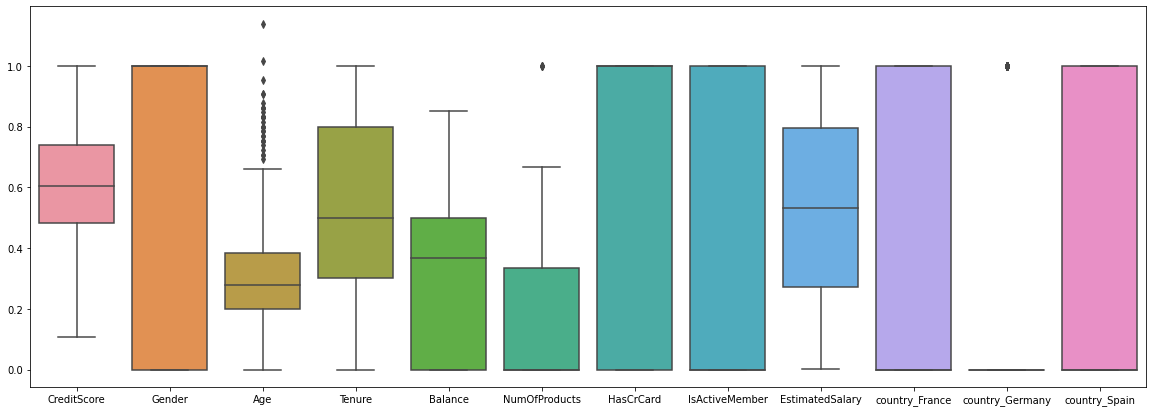

In [57]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X_val)

<Figure size 576x432 with 0 Axes>

(array([ 8., 11.,  7., 12., 21., 32., 43., 43., 68., 65., 81., 84., 62.,
        56., 56., 44., 34., 23., 20., 30.]),
 array([0.108 , 0.1526, 0.1972, 0.2418, 0.2864, 0.331 , 0.3756, 0.4202,
        0.4648, 0.5094, 0.554 , 0.5986, 0.6432, 0.6878, 0.7324, 0.777 ,
        0.8216, 0.8662, 0.9108, 0.9554, 1.    ]),
 <a list of 20 Patch objects>)

(array([  3.,   0.,  13.,  22.,  34.,  76.,  84., 112., 132., 189., 169.,
        185., 171., 214., 161., 133., 101.,  72.,  50.,  79.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([  9.,   7.,  31.,  84., 120., 201., 298., 388., 440., 594., 602.,
        716., 704., 705., 619., 489., 411., 313., 175., 294.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'CreditScore')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'CreditScore distribution')

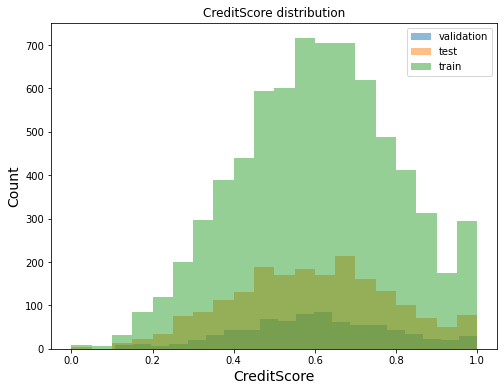

<Figure size 576x432 with 0 Axes>

(array([356.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 444.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([ 905.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1095.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([3282.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 3918.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Gender distribution')

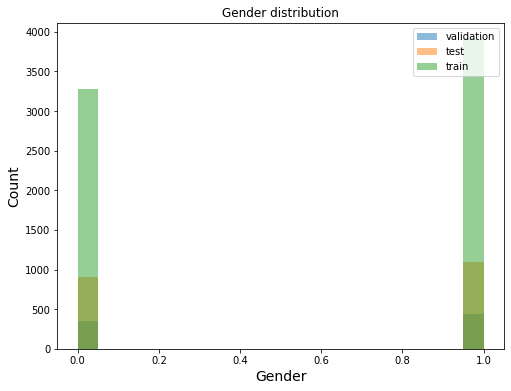

<Figure size 576x432 with 0 Axes>

(array([ 12.,  38., 102.,  87., 168., 126.,  76.,  61.,  49.,  18.,  20.,
         11.,   5.,   7.,  11.,   6.,   1.,   1.,   0.,   1.]),
 array([0.        , 0.05692308, 0.11384615, 0.17076923, 0.22769231,
        0.28461538, 0.34153846, 0.39846154, 0.45538462, 0.51230769,
        0.56923077, 0.62615385, 0.68307692, 0.74      , 0.79692308,
        0.85384615, 0.91076923, 0.96769231, 1.02461538, 1.08153846,
        1.13846154]),
 <a list of 20 Patch objects>)

(array([ 25.,  96., 190., 231., 362., 365., 204., 190., 118.,  50.,  53.,
         43.,  29.,  20.,  11.,   7.,   1.,   2.,   2.,   1.]),
 array([0.        , 0.05692308, 0.11384615, 0.17076923, 0.22769231,
        0.28461538, 0.34153846, 0.39846154, 0.45538462, 0.51230769,
        0.56923077, 0.62615385, 0.68307692, 0.74      , 0.79692308,
        0.85384615, 0.91076923, 0.96769231, 1.02461538, 1.08153846,
        1.13846154]),
 <a list of 20 Patch objects>)

(array([ 105.,  226.,  408.,  675., 1222., 1032.,  949.,  704.,  636.,
         312.,  221.,  228.,  146.,  107.,   71.,   51.,   57.,   28.,
          15.,    7.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age distribution')

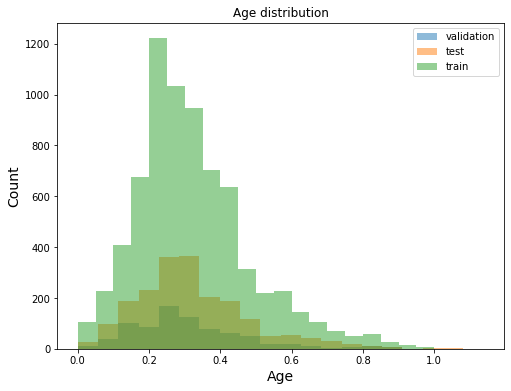

<Figure size 576x432 with 0 Axes>

(array([28.,  0., 69.,  0., 86.,  0., 85.,  0., 74.,  0., 80.,  0., 90.,
         0., 76.,  0., 72.,  0., 95., 45.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([ 80.,   0., 220.,   0., 204.,   0., 208.,   0., 186.,   0., 183.,
          0., 190.,   0., 196.,   0., 220.,   0., 216.,  97.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([305.,   0., 746.,   0., 758.,   0., 716.,   0., 729.,   0., 749.,
          0., 687.,   0., 756.,   0., 733.,   0., 673., 348.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'Tenure')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Tenure distribution')

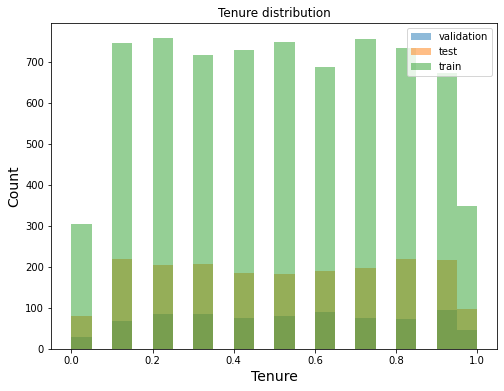

<Figure size 576x432 with 0 Axes>

(array([307.,   0.,   1.,   2.,   5.,  10.,  21.,  26.,  41.,  65.,  69.,
         70.,  62.,  51.,  32.,  21.,  10.,   5.,   0.,   2.]),
 array([0.        , 0.04247665, 0.0849533 , 0.12742995, 0.16990659,
        0.21238324, 0.25485989, 0.29733654, 0.33981319, 0.38228984,
        0.42476649, 0.46724313, 0.50971978, 0.55219643, 0.59467308,
        0.63714973, 0.67962638, 0.72210303, 0.76457967, 0.80705632,
        0.84953297]),
 <a list of 20 Patch objects>)

(array([699.,   1.,   4.,   5.,  16.,  30.,  37.,  70., 107., 155., 207.,
        193., 180., 112.,  79.,  51.,  28.,  14.,   7.,   5.]),
 array([0.        , 0.04306726, 0.08613453, 0.12920179, 0.17226905,
        0.21533631, 0.25840358, 0.30147084, 0.3445381 , 0.38760537,
        0.43067263, 0.47373989, 0.51680715, 0.55987442, 0.60294168,
        0.64600894, 0.68907621, 0.73214347, 0.77521073, 0.81827799,
        0.86134526]),
 <a list of 20 Patch objects>)

(array([2.613e+03, 1.000e+00, 1.200e+01, 3.300e+01, 7.900e+01, 1.770e+02,
        3.440e+02, 5.270e+02, 6.900e+02, 7.780e+02, 7.140e+02, 5.360e+02,
        3.320e+02, 1.970e+02, 1.080e+02, 3.800e+01, 1.600e+01, 3.000e+00,
        0.000e+00, 2.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'Balance')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Balance distribution')

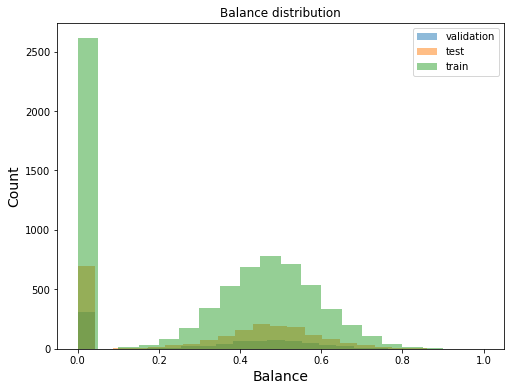

<Figure size 576x432 with 0 Axes>

(array([408.,   0.,   0.,   0.,   0.,   0., 369.,   0.,   0.,   0.,   0.,
          0.,   0.,  19.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([1032.,    0.,    0.,    0.,    0.,    0.,  900.,    0.,    0.,
           0.,    0.,    0.,    0.,   53.,    0.,    0.,    0.,    0.,
           0.,   15.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([3644.,    0.,    0.,    0.,    0.,    0., 3321.,    0.,    0.,
           0.,    0.,    0.,    0.,  194.,    0.,    0.,    0.,    0.,
           0.,   41.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'NumOfProducts')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'NumOfProducts distribution')

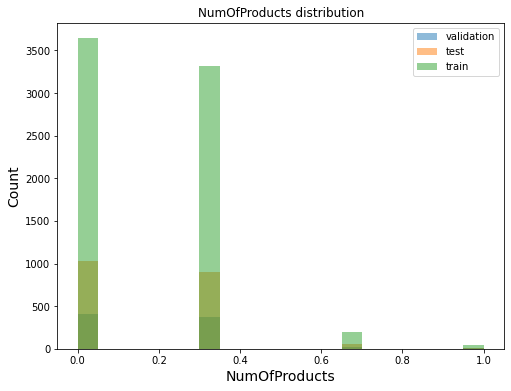

<Figure size 576x432 with 0 Axes>

(array([243.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 557.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([ 573.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1427.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([2129.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 5071.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'HasCrCard')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'HasCrCard distribution')

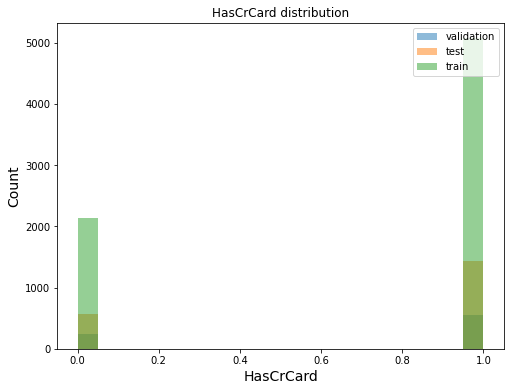

<Figure size 576x432 with 0 Axes>

(array([404.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 396.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([ 951.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1049.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([3494.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 3706.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'IsActiveMember')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'IsActiveMember distribution')

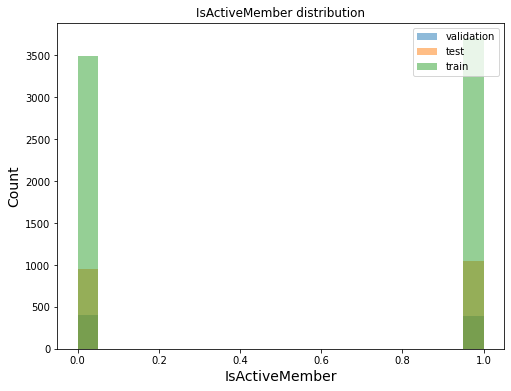

<Figure size 576x432 with 0 Axes>

(array([39., 37., 31., 42., 38., 29., 32., 49., 33., 41., 46., 36., 35.,
        37., 43., 39., 48., 50., 51., 44.]),
 array([0.00216594, 0.05204228, 0.10191862, 0.15179496, 0.2016713 ,
        0.25154764, 0.30142397, 0.35130031, 0.40117665, 0.45105299,
        0.50092933, 0.55080567, 0.60068201, 0.65055835, 0.70043468,
        0.75031102, 0.80018736, 0.8500637 , 0.89994004, 0.94981638,
        0.99969272]),
 <a list of 20 Patch objects>)

(array([ 99., 109., 103.,  96., 100.,  99., 103., 115., 105.,  84., 107.,
         97., 105., 102., 102.,  94.,  92., 103.,  90.,  95.]),
 array([-3.92684295e-04,  4.96323882e-02,  9.96574606e-02,  1.49682533e-01,
         1.99707606e-01,  2.49732678e-01,  2.99757750e-01,  3.49782823e-01,
         3.99807895e-01,  4.49832968e-01,  4.99858040e-01,  5.49883113e-01,
         5.99908185e-01,  6.49933258e-01,  6.99958330e-01,  7.49983403e-01,
         8.00008475e-01,  8.50033548e-01,  9.00058620e-01,  9.50083692e-01,
         1.00010876e+00]),
 <a list of 20 Patch objects>)

(array([379., 327., 356., 343., 360., 378., 370., 356., 372., 369., 379.,
        358., 367., 363., 374., 328., 338., 378., 332., 373.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'EstimatedSalary')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'EstimatedSalary distribution')

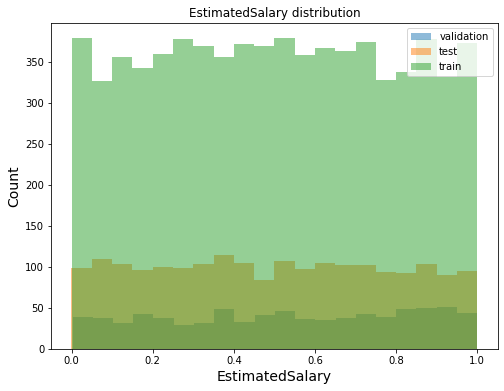

<Figure size 576x432 with 0 Axes>

(array([416.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 384.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([ 980.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1020.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([3590.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 3610.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'country_France')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'country_France distribution')

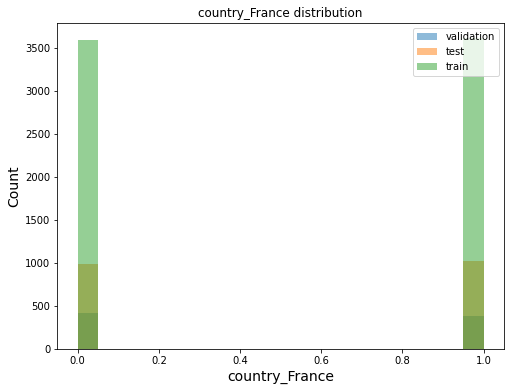

<Figure size 576x432 with 0 Axes>

(array([612.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([1502.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  498.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([5377.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1823.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'country_Germany')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'country_Germany distribution')

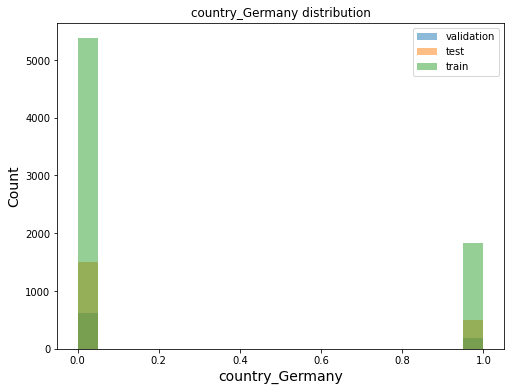

<Figure size 576x432 with 0 Axes>

(array([572.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 228.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([1518.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  482.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

(array([5433.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1767.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'country_Spain')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'country_Spain distribution')

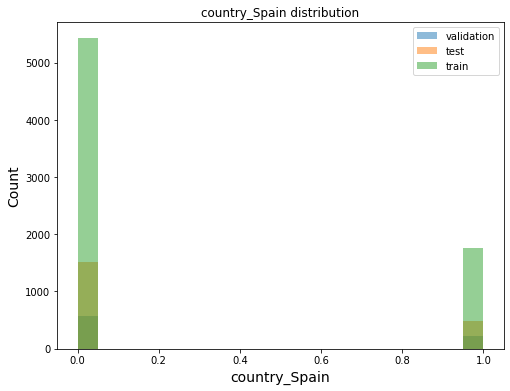

In [58]:
# Looking the data for test, training and validation set
X_test_plot = X_test
X_val_plot = X_val
X_train_plot = X_train
# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8,6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()

## From above plots, we can see that train, test and validation have similar data

In [59]:
sorted(X_train)

['Age',
 'Balance',
 'CreditScore',
 'EstimatedSalary',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'NumOfProducts',
 'Tenure',
 'country_France',
 'country_Germany',
 'country_Spain']

Box plot shows outliers for Age and Number of Products. Confirming analysis using IQR method.

In [60]:
import numpy as np
 
def detect_outlier(data, col_name):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data[col_name]), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data[col_name] if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [61]:
len(detect_outlier(churn_df,'Age'))

411

In [62]:
churn_df.shape

(10000, 11)

In [63]:
detect_outlier(churn_df,'Age')

[66,
 75,
 65,
 73,
 65,
 72,
 67,
 67,
 79,
 62,
 80,
 68,
 75,
 66,
 62,
 66,
 62,
 70,
 63,
 72,
 64,
 62,
 64,
 70,
 62,
 67,
 82,
 63,
 69,
 65,
 69,
 64,
 65,
 74,
 67,
 66,
 67,
 63,
 70,
 62,
 71,
 72,
 67,
 74,
 62,
 76,
 66,
 63,
 66,
 68,
 67,
 63,
 62,
 71,
 66,
 69,
 73,
 62,
 65,
 66,
 64,
 69,
 64,
 77,
 62,
 74,
 65,
 70,
 67,
 69,
 67,
 74,
 69,
 62,
 74,
 74,
 64,
 63,
 63,
 70,
 74,
 65,
 72,
 77,
 66,
 65,
 74,
 88,
 63,
 62,
 71,
 62,
 63,
 62,
 64,
 67,
 70,
 68,
 72,
 71,
 66,
 75,
 67,
 73,
 69,
 76,
 63,
 62,
 85,
 67,
 74,
 76,
 62,
 66,
 69,
 66,
 62,
 62,
 72,
 63,
 71,
 63,
 74,
 67,
 72,
 72,
 66,
 84,
 71,
 62,
 66,
 62,
 63,
 74,
 69,
 84,
 67,
 64,
 68,
 66,
 62,
 77,
 62,
 70,
 67,
 79,
 67,
 76,
 73,
 62,
 66,
 67,
 64,
 73,
 76,
 72,
 64,
 71,
 63,
 70,
 65,
 66,
 65,
 80,
 66,
 63,
 63,
 63,
 62,
 63,
 66,
 62,
 74,
 69,
 63,
 64,
 76,
 75,
 62,
 68,
 69,
 77,
 64,
 66,
 74,
 71,
 67,
 68,
 64,
 68,
 70,
 64,
 75,
 66,
 62,
 64,
 78,
 65,
 74,
 62,


## We can see that the outlier values of age are below 80, which are belivable ages of customers. Hence we do not consider it as a outlier. 

In [64]:
len(detect_outlier(churn_df,'NumOfProducts'))

60

In [65]:
detect_outlier(churn_df,'NumOfProducts')

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

#### Since there are few rows for NumOfProducts = 4, which can belong to few customers, we do not drop them.

### 1. Pearson Correlation 

* The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

* The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

**Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))**

* The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation.

* A value of 0 means no correlation.

* The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [66]:
X_train_full = X_train.copy()
X_train_full['Exited'] = y_train['Exited']

In [67]:
## Check Pearsons correlation between individual features and the target variable
corr = X_train_full.corr(method = 'pearson')
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain,Exited
CreditScore,1.000000,-0.001941,-0.001775,-0.006952,0.009838,0.020937,-0.016224,0.026298,-0.005966,-0.010123,0.003738,0.007984,0.024164
Gender,-0.001941,1.000000,-0.029848,0.016751,0.012091,-0.023656,0.008268,0.020265,-0.021111,-0.003593,-0.015402,0.019737,-0.009126
Age,-0.001775,-0.029848,1.000000,-0.004772,0.025524,-0.033488,-0.018822,0.091037,-0.005538,-0.036618,0.043269,-0.001176,0.004002
Tenure,-0.006952,0.016751,-0.004772,1.000000,-0.008807,0.017164,0.016406,-0.020096,0.016714,-0.006735,0.003755,0.004031,0.023318
Balance,0.009838,0.012091,0.025524,-0.008807,1.000000,-0.300723,-0.009903,-0.027025,0.014137,-0.227329,0.407114,-0.147248,0.006514
NumOfProducts,0.020937,-0.023656,-0.033488,0.017164,-0.300723,1.000000,0.001626,0.017513,0.009783,-0.002547,-0.019939,0.023107,0.016967
HasCrCard,-0.016224,0.008268,-0.018822,0.016406,-0.009903,0.001626,1.000000,-0.020800,-0.015869,0.001496,0.012634,-0.014504,0.031428
IsActiveMember,0.026298,0.020265,0.091037,-0.020096,-0.027025,0.017513,-0.020800,1.000000,-0.015613,0.002141,-0.029614,0.027436,0.005624
EstimatedSalary,-0.005966,-0.021111,-0.005538,0.016714,0.014137,0.009783,-0.015869,-0.015613,1.000000,-0.006893,0.020720,-0.012928,-0.003733
country_France,-0.010123,-0.003593,-0.036618,-0.006735,-0.227329,-0.002547,0.001496,0.002141,-0.006893,1.000000,-0.583888,-0.571880,0.004635


<Figure size 1440x504 with 0 Axes>

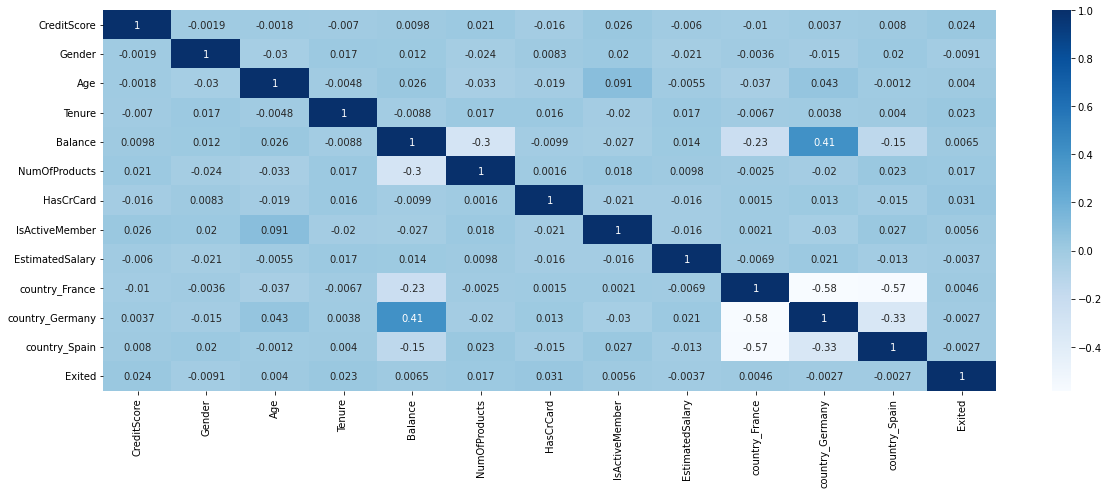

In [68]:
plt.figure(figsize=(20,7))
sns.heatmap(corr, cmap = 'Blues', annot= True)

## Since no value is greater than 0.5 except diagonals, all features are independent. 

### 2. Spearman Correlation

In [69]:
## Check Spearman correlation between individual features and the target variable
corr_spearman = X_train_full.corr(method = 'spearman')
corr_spearman

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain,Exited
CreditScore,1.000000,-0.002931,-0.008024,-0.007839,0.009406,0.019068,-0.011199,0.024385,-0.002015,-0.010150,0.005779,0.005953,0.022285
Gender,-0.002931,1.000000,-0.031299,0.017133,0.011892,-0.014810,0.008268,0.020265,-0.021426,-0.003593,-0.015402,0.019737,-0.009126
Age,-0.008024,-0.031299,1.000000,-0.004012,0.031034,-0.056241,-0.019620,0.046521,0.004227,-0.049211,0.054126,0.002484,0.008926
Tenure,-0.007839,0.017133,-0.004012,1.000000,-0.006426,0.016148,0.016070,-0.020177,0.016808,-0.006823,0.003553,0.004338,0.023252
Balance,0.009406,0.011892,0.031034,-0.006426,1.000000,-0.312993,-0.004685,-0.028124,0.012185,-0.209651,0.378751,-0.139128,0.008300
NumOfProducts,0.019068,-0.014810,-0.056241,0.016148,-0.312993,1.000000,0.003574,0.024152,0.008119,0.004216,-0.033341,0.028792,0.010116
HasCrCard,-0.011199,0.008268,-0.019620,0.016070,-0.004685,0.003574,1.000000,-0.020800,-0.016030,0.001496,0.012634,-0.014504,0.031428
IsActiveMember,0.024385,0.020265,0.046521,-0.020177,-0.028124,0.024152,-0.020800,1.000000,-0.015755,0.002141,-0.029614,0.027436,0.005624
EstimatedSalary,-0.002015,-0.021426,0.004227,0.016808,0.012185,0.008119,-0.016030,-0.015755,1.000000,-0.006801,0.020479,-0.012792,-0.003749
country_France,-0.010150,-0.003593,-0.049211,-0.006823,-0.209651,0.004216,0.001496,0.002141,-0.006801,1.000000,-0.583888,-0.571880,0.004635


<Figure size 1440x504 with 0 Axes>

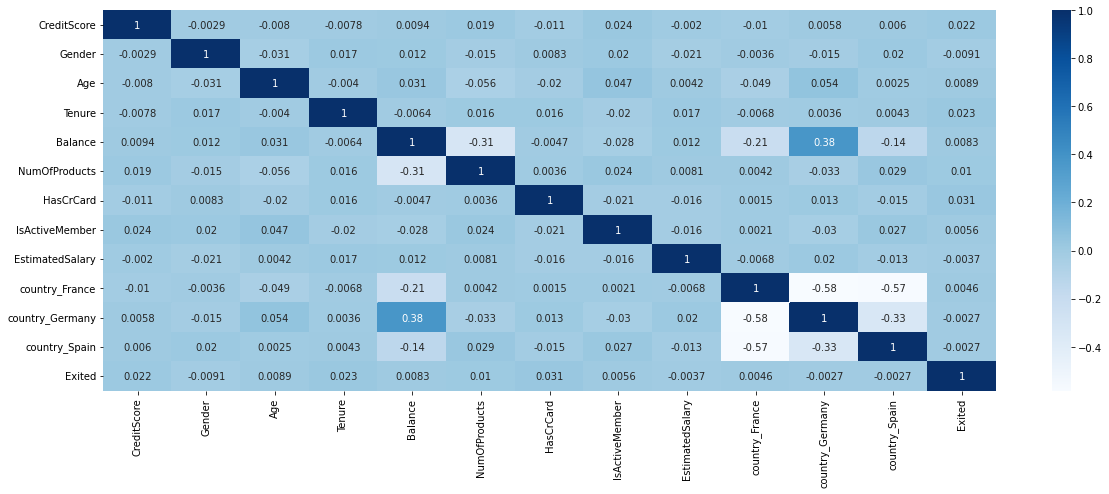

In [70]:
plt.figure(figsize=(20,7))
sns.heatmap(corr_spearman, cmap = 'Blues', annot= True)

#### Pearson's and Spearman's do not show significant relationships with the target variable as they consider linear relationships only.

### 3. OLS method for p-value estimation

In [71]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
model = sm.Logit(y_train.values, X_train).fit()

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.432146
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7200
Model:                          Logit   Df Residuals:                     7188
Method:                           MLE   Df Model:                           11
Date:                Tue, 04 Oct 2022   Pseudo R-squ.:                  0.1528
Time:                        02:35:38   Log-Likelihood:                -3111.5
converged:                       True   LL-Null:                       -3672.5
Covariance Type:            nonrobust   LLR p-value:                1.010e-233
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.3672      0.164     -2.239      0.025      -0.689      -0.046
Gender             -0.5369      0.064     -8.407      0.000      -0.662      -0.412
Age                 4.7075      0.196     23.975      0.000       4.323       5.092
Tenure             -0.1432      0.110     -1.303      0.192      -0.358       0.072
Balance             0.6146      0.151      4.061      0.000       0.318       0.911
NumOfProducts      -0.2776      0.166     -1.676      0.094      -0.602       0.047
HasCrCard          -0.0326      0.070     -0.468      0.640      -0.169       0.104
IsActiveMember     -1.0690      0.068    -15.811      0.000      -1.202      -0.937
EstimatedSalary    -0.0532      0.111     -0.477      0.633      -0.271       0.165
country_France     -2.3247      0.171    -13.579      0.000      -2.660      -1.989
country_Germany    -1.5070      0.185     -8.134      0.000      -1.870      -1.144
country_Spain      -2.2510      0.178    -12.614      0.000      -2.601      -1.901
===================================================================================
"""

#### Considering the significance value of 0.05 because accuracy in predicting the churn of customer is not that critical
P-value less than 0.05 means significant, greater than 0.05 means not significant

1. Credit Score has a p value of 0.025, hence it is a significant feature
2. Gender has a p value of 0.0, hence it is a significant feature
3. Age has a p value of 0.0, hence it is a significant feature
4. Tenure has a p value of 0.192, hence it is not a significant feature
5. Balance has a p-value of 0.0, hence it is a significant feature
6. Number of products has a p-value of 0.095, hence it is not a significant feature
7. HasCrCard has a p-value of 0.640, hence it is not a significant feature
8. IsActiveMember ha s a p-value of 0.0, hence it is a significant feature
9. Estimated Salary has a p-value of 0.633, hence it is not a significant feature
10. Geography (France, Germany, Spain) has a p-value of 0.0, hence it is a significant feature

## Modelling using Logistic Regression from sklearn

In [72]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [73]:
lr = LogisticRegression()

In [74]:
lr.fit(X_train, y_train)

LogisticRegression()

In [75]:
lr.coef_
lr.intercept_

array([[-0.3556253 , -0.53285161,  4.52966747, -0.13989539,  0.59968052,
        -0.2784675 , -0.03306998, -1.04840544, -0.05181283, -0.29542862,
         0.51873855, -0.22170424]])

array([-1.97542836])

In [76]:
## Training metrics
roc_auc_score(y_train, lr.predict(X_train))
recall_score(y_train, lr.predict(X_train))
confusion_matrix(y_train, lr.predict(X_train))
print(classification_report(y_train, lr.predict(X_train)))

0.5930751790476614

0.22065727699530516

array([[5512,  197],
       [1162,  329]])

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5709
           1       0.63      0.22      0.33      1491

    accuracy                           0.81      7200
   macro avg       0.73      0.59      0.61      7200
weighted avg       0.78      0.81      0.77      7200



In [77]:
## Validation metrics
roc_auc_score(y_val, lr.predict(X_val))
recall_score(y_val, lr.predict(X_val))
confusion_matrix(y_val, lr.predict(X_val))
print(classification_report(y_val, lr.predict(X_val)))

0.5762241011809154

0.1895424836601307

array([[623,  24],
       [124,  29]])

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       647
           1       0.55      0.19      0.28       153

    accuracy                           0.81       800
   macro avg       0.69      0.58      0.59       800
weighted avg       0.78      0.81      0.78       800



In [78]:
## Test Set metrics
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

0.5837628315052942

0.20610687022900764

array([[1545,   62],
       [ 312,   81]])

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000



## Feature Importance

Feature: 0, Score: -0.35563
Feature: 1, Score: -0.53285
Feature: 2, Score: 4.52967
Feature: 3, Score: -0.13990
Feature: 4, Score: 0.59968
Feature: 5, Score: -0.27847
Feature: 6, Score: -0.03307
Feature: 7, Score: -1.04841
Feature: 8, Score: -0.05181
Feature: 9, Score: -0.29543
Feature: 10, Score: 0.51874
Feature: 11, Score: -0.22170


<BarContainer object of 12 artists>

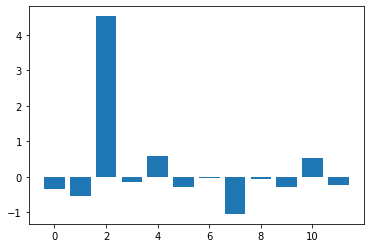

In [79]:
# get importance
from matplotlib import pyplot
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Important features
Feature 2: Age

Feature 7: IsActiveMember

# Data Imputation

## For 1% randomly removed data

In [80]:
X_train_missing1 = X_train.copy()

In [81]:
#removing 1% random data
for col in X_train_missing1.columns:
    X_train_missing1.loc[X_train_missing1.sample(frac=0.01).index, col] = pd.np.nan

In [82]:
X_train_missing1.isna().sum()

CreditScore        72
Gender             72
Age                72
Tenure             72
Balance            72
NumOfProducts      72
HasCrCard          72
IsActiveMember     72
EstimatedSalary    72
country_France     72
country_Germany    72
country_Spain      72
dtype: int64

In [83]:
X_train_missing1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain
0,0.376,1.0,0.769231,0.9,0.000000,0.333333,1.0,0.0,0.552082,0.0,0.0,1.0
1,0.918,0.0,0.323077,0.5,0.000000,0.000000,1.0,0.0,0.388310,1.0,0.0,0.0
2,0.540,1.0,0.215385,0.7,0.000000,0.333333,1.0,1.0,0.172982,1.0,0.0,0.0
3,0.658,1.0,0.230769,0.4,0.383065,0.000000,1.0,NaN,0.005419,0.0,0.0,1.0
4,0.450,1.0,0.184615,0.2,0.000000,0.333333,1.0,1.0,0.410909,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.232,0.0,0.184615,0.3,0.000000,0.000000,1.0,0.0,0.970051,1.0,0.0,0.0
7196,0.878,0.0,0.338462,0.4,0.000000,0.333333,1.0,0.0,0.686971,0.0,0.0,1.0
7197,0.682,1.0,0.153846,0.1,0.000000,0.333333,0.0,0.0,0.464154,1.0,0.0,0.0
7198,0.816,1.0,0.261538,0.5,0.000000,0.333333,1.0,0.0,0.474881,0.0,0.0,1.0


Selecting columns to replace with mean, mode or zeroes

In [84]:
mean_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
frequent_cols = ['Gender', 'NumOfProducts']
zero_cols = ['HasCrCard', 'Tenure', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain']

# 3 methods of filling values:
1. Replacing nulls in few columns with the mean
2. Replacing nulls in few columns with the mode (most frequent value)
3. Replacing nulls in few columns with zeroes

In [85]:
for i in mean_cols:
    X_train_missing1[i].fillna(X_train_missing1[i].mean(), inplace=True)
    
for i in frequent_cols:
    X_train_missing1[i].fillna(X_train_missing1[i].mode()[0], inplace=True)
    
X_train_missing1[zero_cols] = X_train_missing1[zero_cols].fillna(0)

In [86]:
X_train_missing1.isna().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
country_France     0
country_Germany    0
country_Spain      0
dtype: int64

In [87]:
lr.fit(X_train_missing1, y_train)

LogisticRegression()

In [88]:
## Test Set metrics
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

0.5824905668742508

0.2035623409669211

array([[1545,   62],
       [ 313,   80]])

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000



# For 5% randomly removed data

In [89]:
#removing 5% random data
X_train_missing5 = X_train.copy()
for col in X_train_missing5.columns:
    X_train_missing5.loc[X_train_missing5.sample(frac=0.05).index, col] = pd.np.nan

In [90]:
for i in mean_cols:
    X_train_missing5[i].fillna(X_train_missing5[i].mean(), inplace=True)
    
for i in frequent_cols:
    X_train_missing5[i].fillna(X_train_missing5[i].mode()[0], inplace=True)
    
X_train_missing5[zero_cols] = X_train_missing5[zero_cols].fillna(0)

In [91]:
lr.fit(X_train_missing5, y_train)

LogisticRegression()

In [92]:
## Test Set metrics
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

0.5764126729274437

0.18829516539440203

array([[1550,   57],
       [ 319,   74]])

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.19      0.28       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



# For 10% randomly imputed data

In [93]:
#removing 10% random data
X_train_missing10 = X_train.copy()
for col in X_train_missing10.columns:
    X_train_missing10.loc[X_train_missing10.sample(frac=0.1).index, col] = pd.np.nan

In [94]:
for i in mean_cols:
    X_train_missing10[i].fillna(X_train_missing10[i].mean(), inplace=True)
    
for i in frequent_cols:
    X_train_missing10[i].fillna(X_train_missing10[i].mode()[0], inplace=True)
    
X_train_missing10[zero_cols] = X_train_missing10[zero_cols].fillna(0)

In [95]:
lr.fit(X_train_missing10, y_train)

LogisticRegression()

In [96]:
## Test Set metrics
roc_auc_score(y_test, lr.predict(X_test))
recall_score(y_test, lr.predict(X_test))
confusion_matrix(y_test, lr.predict(X_test))
print(classification_report(y_test, lr.predict(X_test)))

0.5764126729274437

0.18829516539440203

array([[1550,   57],
       [ 319,   74]])

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.19      0.28       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### The imputation methods work very well on 1%, 5% and 10% imputed data. The accuracy remains same as it was before the imputation process. However, there is slight difference in the precision and recall metrics as shown above.

# Final Answers
1. What are the data types? (Only numeric and categorical)
    * For Credit Score: **Numeric**
    * For Geography: **Categorical**
    * For Gender: **Categorical**
    * For Age: **Numeric**
    * For Tenure: **Numeric**
    * For Balance: **Numeric**
    * For NumOfProducts: **Numeric**
    * For HasCrCard: **Categorical**
    * For IsActiveMember: **Categorical**
    * For EstimatedSalary: **Numeric**
    * For Exited: **Categorical**
    
2. Are there missing values?
    No, there are no missing values in the dataset

3. What are the likely distributions of the numeric variables?
    - Credit Score: Normal Distribution
    - Age: Gamma
    - Tenure: Uniform
    - Balance: Bimodal
    - Estimated Salary: Uniform

4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
 After using Pearsons correlation, Spearman's correlation and Logit estimation of p -values using OLS method, we can conclude that Credit Score, Gender, Age, Balance, IsActiveMember and Geography are important/significant features.

5. Which independent variables have missing data? How much? 
    - There is no missing data.

6. Do the training and test sets have the same data?
    - Yes, we can infer this from the box plots for all sets above.

7. Are the predictor variables independent of all the other predictor variables?
    - Yes, we can infer this from the correlation matrix.

8. Which predictor variables are the most important?
    - Feature and IsActiveMember


9. Do the ranges of the predictor variables make sense?
     - Geography has 3 possible values: France, Spain and Germany
     - Credit score ranges from 350-850 which lies in the possible values of credit scores (300-850)
     - HasCard: Can be 0 or 1. 0 means does not have card, 1 means has card
     - IsActiveMember: Can be 0 or 1. 0 means is not an active member, 1 means is an active member.
     - All other features including Tenure, Balance, NumOfProducts and Salary are within their normal ranges and do not have any outliers.

10. What are the distributions of the predictor variables?
    - Credit Score: Normal Distribution
    - Age: Gamma
    - Tenure: Uniform
    - Balance: Bimodal
    - Estimated Salary: Uniform


11.  Remove outliers and keep outliers (does if have an effect of the final predictive model)?
    - There are no outliers in the data.

12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. For categorical data, calculate the accuracy and a confusion matrix.
        - Explained in previous cell



# Refernces
1. Sckit learn offcial documentation
2. Refered Towards Data Science
The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science . The remaining code was written independently. Feature importance reference is taken from sklearn offical documnetation
3. https://stats.stackexchange.com/questions/8071/how-to-choose-between-pearson-and-spearman-correlation
4. https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
5. https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c#:~:text=Definition%20of%20Train%2DValid%2DTest,of%20these%20datasets%20is%20below.

Copyright 2022 Shivani Shekhawat

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.